In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [108]:
han_sig=pd.read_csv("C:\\Users\\acer\\Desktop\\machine\\proj\\sign_mnist_train.csv")

In [109]:
han_sig.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [110]:
han_sig.shape

(27455, 785)

In [111]:
r=han_sig.iloc[0,1:]


In [112]:
row1_shp=r.values.reshape(28,28)

In [113]:
row1_shp

array([[107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
        165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
        170, 169],
       [111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160, 163, 164,
        170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172, 172, 171,
        171, 170],
       [113, 123, 131, 137, 142, 145, 150, 152, 155, 158, 161, 163, 164,
        172, 105, 142, 170, 171, 171, 171, 172, 172, 173, 173, 172, 171,
        171, 171],
       [116, 125, 133, 139, 143, 146, 151, 153, 156, 159, 162, 163, 167,
        167,  95, 144, 171, 172, 172, 172, 172, 172, 173, 173, 173, 172,
        172, 171],
       [117, 126, 134, 140, 145, 149, 153, 156, 158, 161, 163, 164, 175,
        156,  87, 154, 172, 173, 173, 173, 173, 173, 174, 174, 174, 173,
        172, 172],
       [119, 128, 136, 142, 146, 150, 153, 156, 159, 163, 165, 164, 184,
        148,  89, 164, 172, 174, 174, 174, 174, 175, 175, 174, 175, 174,
        173, 173],
       [12

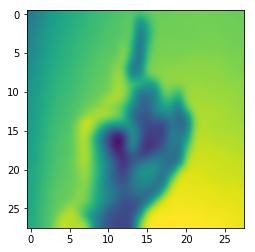

In [114]:
row1_img=plt.imshow(row1_shp,interpolation="bicubic")

In [115]:
pca=PCA(n_components=625)

In [116]:
pca.fit(han_sig.drop(labels="label",axis=1))

PCA(copy=True, iterated_power='auto', n_components=625, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [117]:
x_t=pca.transform(han_sig.drop(labels="label",axis=1))


In [118]:
x_t.shape

(27455, 625)

In [119]:
Y=han_sig["label"]
X=x_t

In [120]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [121]:
dec=DecisionTreeClassifier(criterion="entropy")

In [122]:
dec.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
pred_dec= dec.predict(X_test)

In [124]:
print ("Accuracy is ", accuracy_score(Y_test,pred_dec)*100)

Accuracy is  96.15734838827171


In [143]:
print(classification_report(Y_test,pred_dec))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       221
          1       0.99      0.99      0.99       188
          2       0.98      0.97      0.98       220
          3       0.96      0.96      0.96       256
          4       0.96      0.97      0.96       202
          5       0.96      0.96      0.96       242
          6       0.96      0.96      0.96       221
          7       0.96      0.97      0.96       205
          8       0.95      0.95      0.95       219
         10       0.98      0.96      0.97       219
         11       0.96      0.97      0.97       268
         12       0.94      0.94      0.94       232
         13       0.96      0.94      0.95       209
         14       0.96      0.98      0.97       219
         15       0.98      0.98      0.98       202
         16       0.98      0.97      0.98       291
         17       0.96      0.96      0.96       261
         18       0.97      0.93      0.95   

In [146]:
d2=DecisionTreeClassifier(criterion="gini")

In [147]:
d2.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [148]:
pred_d2= d2.predict(X_test)

In [149]:
print ("Accuracy is ", accuracy_score(Y_test,pred_d2)*100)

Accuracy is  94.66399562921144


In [153]:
print(classification_report(Y_test,pred_d2))

             precision    recall  f1-score   support

          0       0.97      0.96      0.97       221
          1       0.95      0.95      0.95       188
          2       0.96      0.99      0.98       220
          3       0.93      0.96      0.94       256
          4       0.96      0.96      0.96       202
          5       0.97      0.94      0.95       242
          6       0.92      0.93      0.93       221
          7       0.95      0.96      0.95       205
          8       0.90      0.93      0.91       219
         10       0.96      0.95      0.95       219
         11       0.97      0.95      0.96       268
         12       0.96      0.93      0.94       232
         13       0.95      0.97      0.96       209
         14       0.95      0.99      0.97       219
         15       0.93      0.96      0.94       202
         16       0.97      0.97      0.97       291
         17       0.96      0.90      0.93       261
         18       0.93      0.89      0.91   

In [125]:
c=RandomForestClassifier()

In [126]:
c.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
y_pred_rf = c.predict(X_test)

In [128]:
print ("Accuracy is ", accuracy_score(Y_test,y_pred_rf)*100)

Accuracy is  99.72682571480604


In [129]:
print(classification_report(Y_test,y_pred_rf))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       221
          1       0.99      1.00      0.99       188
          2       0.99      1.00      1.00       220
          3       1.00      1.00      1.00       256
          4       1.00      0.99      0.99       202
          5       1.00      1.00      1.00       242
          6       0.99      1.00      1.00       221
          7       1.00      1.00      1.00       205
          8       1.00      0.98      0.99       219
         10       1.00      1.00      1.00       219
         11       1.00      1.00      1.00       268
         12       1.00      1.00      1.00       232
         13       1.00      1.00      1.00       209
         14       1.00      1.00      1.00       219
         15       1.00      1.00      1.00       202
         16       1.00      1.00      1.00       291
         17       1.00      1.00      1.00       261
         18       1.00      1.00      1.00   

In [130]:
knn=KNeighborsClassifier(n_neighbors=5)

In [131]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [132]:
pred_knn=knn.predict(X_test)

In [133]:
print(classification_report(Y_test,pred_knn))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       221
          1       0.99      1.00      1.00       188
          2       1.00      1.00      1.00       220
          3       1.00      1.00      1.00       256
          4       1.00      1.00      1.00       202
          5       1.00      1.00      1.00       242
          6       1.00      1.00      1.00       221
          7       1.00      1.00      1.00       205
          8       1.00      0.99      0.99       219
         10       1.00      1.00      1.00       219
         11       1.00      1.00      1.00       268
         12       1.00      0.98      0.99       232
         13       0.98      1.00      0.99       209
         14       1.00      1.00      1.00       219
         15       1.00      1.00      1.00       202
         16       1.00      1.00      1.00       291
         17       0.99      0.99      0.99       261
         18       1.00      1.00      1.00   

In [134]:
print ("Accuracy is ", accuracy_score(Y_test,pred_knn)*100)

Accuracy is  99.59934438171554


In [135]:
svclassifier = SVC(kernel='linear', degree=8)  

In [136]:
svclassifier.fit(X_train, Y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [137]:
y_predsvc = svclassifier.predict(X_test)

In [138]:
print(classification_report(Y_test,y_predsvc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       221
          1       1.00      1.00      1.00       188
          2       1.00      1.00      1.00       220
          3       1.00      1.00      1.00       256
          4       1.00      1.00      1.00       202
          5       1.00      1.00      1.00       242
          6       1.00      1.00      1.00       221
          7       1.00      1.00      1.00       205
          8       1.00      1.00      1.00       219
         10       1.00      1.00      1.00       219
         11       1.00      1.00      1.00       268
         12       1.00      1.00      1.00       232
         13       1.00      1.00      1.00       209
         14       1.00      1.00      1.00       219
         15       1.00      1.00      1.00       202
         16       1.00      1.00      1.00       291
         17       1.00      1.00      1.00       261
         18       1.00      1.00      1.00   

In [139]:
print ("Accuracy is ", accuracy_score(Y_test,y_predsvc)*100)

Accuracy is  100.0


In [150]:
d={"CLASSIFIER":["DECISION TREE(GINI)","DECISION TREE","RANDOM FOREST","KNEARESTNEIGHBOR","SUPPORT VECTOR MACHINE"],"ACCURACY":[ 94.66,96.13,99.83,99.59,100.0]}

In [151]:
df=pd.DataFrame(data=d)

In [152]:
df

,CLASSIFIER,ACCURACY
0,DECISION TREE(GINI),94.66
1,DECISION TREE,96.13
2,RANDOM FOREST,99.83
3,KNEARESTNEIGHBOR,99.59
4,SUPPORT VECTOR MACHINE,100.00
